In [35]:
import pandas as pd
import numpy as np
from datetime import date

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
trx_cenabast_ = pd.read_excel('Datos.xlsx')
trx_cenabast = trx_cenabast_.copy()

In [9]:
trx_cenabast = trx_cenabast_.copy()

In [10]:
trx_cenabast.head()

,ZGEN,Documento comercial,Material,Denominación,Solicitante,Nombre 1,Clte(DM),Fecha documento,mes,Año,...,Jerarquía DT,Precio Venta Cenabast Bruto,Precio Máximo Venta al Público,Precio Promedio Ponderado Retail,Nombre Proveedor,Region,Comuna,Puesto de Descarga,Latitude,Longitude
0,100000903,306344037,500011462,PROLOPA 200/50 MG FRA 30 CM,77208124,FARMACIAS DEL SUR SPA,204264,2021-08-09,8,2021,...,Antiparkinsonianos,4087,7062,23441,ROCHE CHILE LIMITADA,IX Región de La Araucanía,TEMUCO,LOS QUIMICOS 55,-38.716828,-72.650249
1,100000713,306344037,500012180,GEMFIBROZILO 300 MG CAJ 30 CM REC,77208124,FARMACIAS DEL SUR SPA,204264,2021-08-09,8,2021,...,Antihiperlipidémicos/ hipocolesterolém.,2044,3606,3450,77596940 LABORATORIO CHILE S.A.,IX Región de La Araucanía,TEMUCO,LOS QUIMICOS 55,-38.716828,-72.650249
2,100000713,306344037,500011435,GEMFIBROZILO 300 MG CAJ 30 CP,77208124,FARMACIAS DEL SUR SPA,204264,2021-08-09,8,2021,...,Antihiperlipidémicos/ hipocolesterolém.,1948,3692,3450,77596940 LABORATORIO CHILE S.A.,IX Región de La Araucanía,TEMUCO,LOS QUIMICOS 55,-38.716828,-72.650249
3,100000382,306344037,500011924,CITALOPRAM 20 MG CAJ 30 CM,77208124,FARMACIAS DEL SUR SPA,204264,2021-08-09,8,2021,...,Antidepresivos,955,2000,5872,PHARMATRADE S.A.,IX Región de La Araucanía,TEMUCO,LOS QUIMICOS 55,-38.716828,-72.650249
4,100001970,306344036,500011720,NOVORAPID 100U/ML SOL INY 10ML CAJ 1 FAM,77208124,FARMACIAS DEL SUR SPA,204264,2021-08-09,8,2021,...,Antidiabéticos e hipoglicémicos,15280,24450,10840,NOVO NORDISK FARMACEUTICAL LTDA,IX Región de La Araucanía,TEMUCO,LOS QUIMICOS 55,-38.716828,-72.650249


In [5]:
trx_cenabast.columns

Index(['ZGEN', 'Documento comercial', 'Material', 'Denominación',
       'Solicitante', 'Nombre 1', 'Clte(DM)', 'Fecha documento', 'mes', 'Año',
       'Fecha de entrega', 'cantidad real', 'valorizado', 'Jerarquía DT',
       'Precio Venta Cenabast Bruto', 'Precio Máximo Venta al Público',
       'Precio Promedio Ponderado Retail', 'Nombre Proveedor', 'Region',
       'Comuna', 'Puesto de Descarga', 'Latitude', 'Longitude'],
      dtype='object')

In [15]:
trx_cenabast = trx_cenabast_.copy()
trx_cenabast = trx_cenabast.rename(columns={'Nombre 1':'Name','valorizado':'Money','ZGEN':'molecule_code','Clte(DM)':'client_code','Fecha de entrega':'order_delivery_date'})

In [18]:
today = pd.to_datetime('2022-04-25',format = '%Y-%m-%d')

In [36]:
df_cluster = trx_cenabast.groupby(['client_code']).agg(total_money=('Money','sum'),
                                    total_products = ('molecule_code','nunique'),
                                    total_interactions = ('order_delivery_date','nunique'),
                                    first_order = ('order_delivery_date','min'))


#df_cluster['month_as_client'] =  (today-df_cluster['lenght_time_as_client']).dt.month
df_cluster['month_as_client'] =   ((today - df_cluster['first_order'])/np.timedelta64(1, 'M'))
df_cluster['avg_freq_monthly_order'] =  df_cluster['total_interactions']/ df_cluster['month_as_client']

df_cluster = df_cluster.reset_index()                             

In [38]:
df_cluster.columns

Index(['client_code', 'total_money', 'total_products', 'total_interactions',
       'first_order', 'month_as_client', 'avg_freq_monthly_order'],
      dtype='object')

In [39]:
X=df_cluster[['total_money',
 'total_products',
 'total_interactions',
 'month_as_client',
 'avg_freq_monthly_order']]
Y=df_cluster['client_code']

In [40]:
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X)

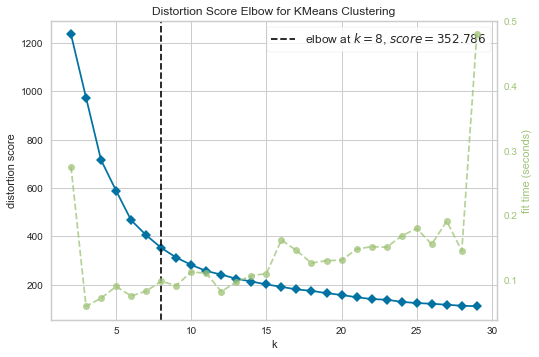

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Elbow Method for K means
# Import ElbowVisualizer

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X_std)        # Fit data to visualizer
visualizer.show() 

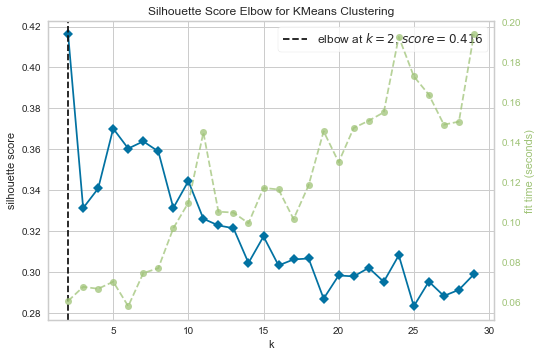

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

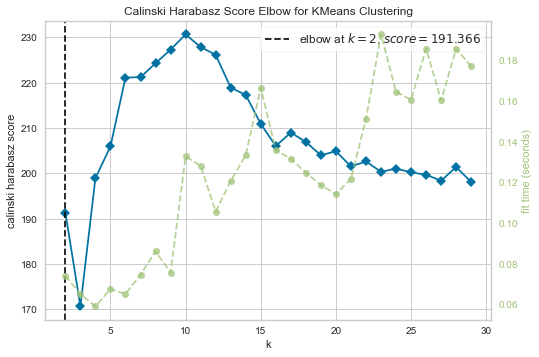

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [43]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        

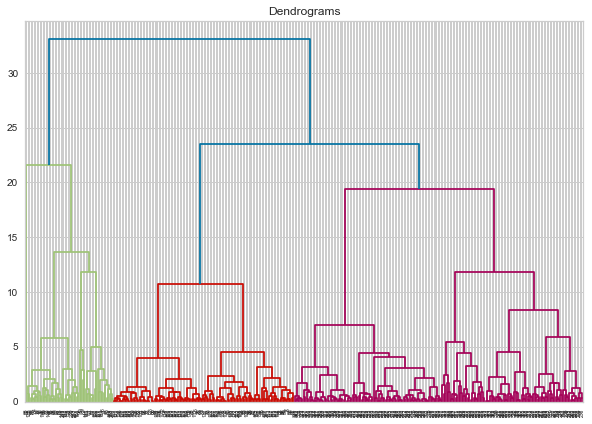

In [44]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))

In [45]:
kmeans = KMeans(n_clusters=8).fit(X_std)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.25440178e-01  2.52291096e-01 -1.92247292e-01 -5.77510776e-01
   1.47715402e-01]
 [-1.61716973e-01 -8.82425002e-01 -7.61981145e-01 -1.08730131e+00
  -5.07813242e-01]
 [-1.54764500e-01 -4.71441988e-01 -4.33523151e-01  8.83919111e-01
  -7.51216276e-01]
 [ 2.78573893e-01  2.03706557e+00  2.86206014e+00  9.08887799e-01
   1.86685965e+00]
 [-6.30942784e-02  3.72729268e-01  4.53454203e-01 -9.57603782e-01
   2.05153954e+00]
 [ 1.56692715e+01 -1.52371226e-01  6.99656931e-01  1.28140098e+00
  -1.48028067e-02]
 [-6.81031235e-03  8.97995369e-01  7.15845218e-01  8.53765314e-01
   1.87603952e-01]
 [ 4.83310881e+00  2.27957729e+00  2.53456406e+00  1.20459414e+00
   1.31728444e+00]]


In [46]:
# Kmeans
model = KMeans(n_clusters=kmeans.n_clusters, random_state=0)
y_clusters = model.fit_predict(X_std)

In [48]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=6)
dbscan = DBSCAN(eps=2.0)

# Fit the algorithms to the features
kmeans.fit(X_std)
dbscan.fit(X_std)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = metrics.silhouette_score(X_std, kmeans.labels_).round(2)
dbscan_silhouette = metrics.silhouette_score(X_std, dbscan.labels_).round (2)

print(kmeans_silhouette)
print(dbscan_silhouette)

0.36
0.67


In [49]:
#predict the labels of clusters.
label = kmeans.fit_predict(X_std)
X['label'] = label

C:\Users\diego\AppData\Local\Temp/ipykernel_28204/4195043971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = label


In [51]:
X.groupby(['label']).agg(total_money = ('total_money','sum'),
                        avg_money = ('total_money','mean'),
                        total_products = ('total_products','sum'),
                        avg_products = ('total_products','mean'),
                        total_interactions = ('total_interactions','sum'),
                        avg_total_interactions = ('total_interactions','mean'),
                        #avg_price_pond = ('avg_price_pond','mean'),
                        avg_month_as_client = ('month_as_client','mean'),
                        avg_freq_monthly_order = ('avg_freq_monthly_order','mean')).reset_index().sort_values('total_products')

,label,total_money,avg_money,total_products,avg_products,total_interactions,avg_total_interactions,avg_month_as_client,avg_freq_monthly_order
3,3,1969245347,9.846227e+08,388,194.000000,103,51.500000,20.435738,2.539863
2,2,385685871,3.383209e+06,5221,45.798246,663,5.815789,6.185941,1.046190
5,5,1843828129,7.682617e+07,6016,250.666667,1947,81.125000,18.884714,4.335403
0,0,353403229,3.720034e+06,6050,63.684211,1064,11.200000,18.217514,0.626322
1,1,496566041,9.549347e+06,6358,122.269231,1322,25.423077,6.732724,3.893374
4,4,1264552821,1.453509e+07,14172,162.896552,2732,31.402299,16.921776,1.851969
